In [171]:
import numpy as np
import pandas as pd
import yfinance as yf

In [172]:
import matplotlib.pyplot as plt
plt.style.use("seaborn")

<ipython-input-172-222f5fd5c04b>:2: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



In [173]:
data = yf.download(["AAPL"],start = "2023-03-26", end = "2023-04-01", interval='1m')
print(type(data))

[*********************100%***********************]  1 of 1 completed
<class 'pandas.core.frame.DataFrame'>


In [174]:
data.dropna(inplace=True)  # deletes tows with NaN values

In [175]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2023-03-27 09:30:00-04:00,159.940002,160.190002,159.899994,160.130005,160.130005,1947970
2023-03-27 09:31:00-04:00,160.100006,160.154999,159.839996,159.960007,159.960007,206247
2023-03-27 09:32:00-04:00,159.960007,160.160004,159.839996,160.020004,160.020004,211444
2023-03-27 09:33:00-04:00,159.994995,160.319000,159.910004,160.000000,160.000000,285796
2023-03-27 09:34:00-04:00,159.981903,160.020004,159.649994,159.720001,159.720001,259715


In [176]:
data.describe() # Statistical info about stocks

,Open,High,Low,Close,Adj Close,Volume
count,1948.000000,1948.000000,1948.000000,1948.000000,1948.000000,1.948000e+03
mean,160.278407,160.329950,160.225947,160.278953,160.278953,1.118124e+05
std,2.418317,2.416804,2.421201,2.421092,2.421092,1.251025e+05
min,156.029907,156.050003,155.979996,156.029999,156.029999,2.589800e+04
25%,158.419998,158.479996,158.369995,158.425003,158.425003,6.177200e+04
50%,160.130005,160.190002,160.072502,160.130005,160.130005,8.413250e+04
75%,162.139999,162.169998,162.095001,162.136246,162.136246,1.236320e+05
max,164.940002,165.000000,164.891800,164.943893,164.943893,2.330398e+06


In [177]:
close = data.loc[:, "Close"].copy()       # Recieve Close prices stocks

In [178]:
close

Datetime
2023-03-27 09:30:00-04:00    160.130005
2023-03-27 09:31:00-04:00    159.960007
2023-03-27 09:32:00-04:00    160.020004
2023-03-27 09:33:00-04:00    160.000000
2023-03-27 09:34:00-04:00    159.720001
                                ...    
2023-03-31 15:55:00-04:00    164.919998
2023-03-31 15:56:00-04:00    164.934998
2023-03-31 15:57:00-04:00    164.889999
2023-03-31 15:58:00-04:00    164.940002
2023-03-31 15:59:00-04:00    164.839996
Name: Close, Length: 1948, dtype: float64

Log Returns:

In [179]:
# Calculates the log returns over the stated time interval
rets = np.log(data / data.shift()) 
rets.dropna(inplace=True)

In [180]:
rets['Close'].head()

Datetime
2023-03-27 09:31:00-04:00   -0.001062
2023-03-27 09:32:00-04:00    0.000375
2023-03-27 09:33:00-04:00   -0.000125
2023-03-27 09:34:00-04:00   -0.001752
2023-03-27 09:35:00-04:00   -0.000877
Name: Close, dtype: float64

Plotting retrun data:

In [181]:
import cufflinks as cf  # Cufflinks
import configparser as cp
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from sklearn import preprocessing
import plotly
import plotly.express as px

In [182]:
cf.set_config_file(offline=True)     # set the plotting mode to offline

In [183]:
norm = close.normalize()
norm

Datetime
2023-03-27 09:30:00-04:00    100.000000
2023-03-27 09:31:00-04:00     99.893837
2023-03-27 09:32:00-04:00     99.931305
2023-03-27 09:33:00-04:00     99.918813
2023-03-27 09:34:00-04:00     99.743956
                                ...    
2023-03-31 15:55:00-04:00    102.991315
2023-03-31 15:56:00-04:00    103.000682
2023-03-31 15:57:00-04:00    102.972581
2023-03-31 15:58:00-04:00    103.003808
2023-03-31 15:59:00-04:00    102.941355
Name: Close, Length: 1948, dtype: float64

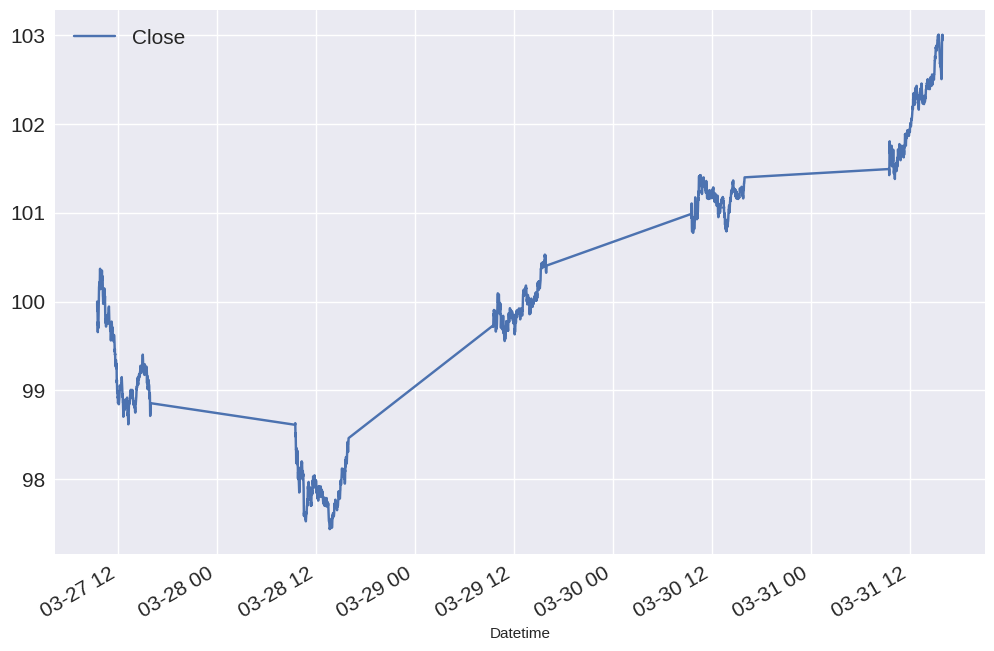

In [184]:
norm.plot(figsize = (12,8), fontsize= 15)
plt.legend(loc = "upper left", fontsize = 15)

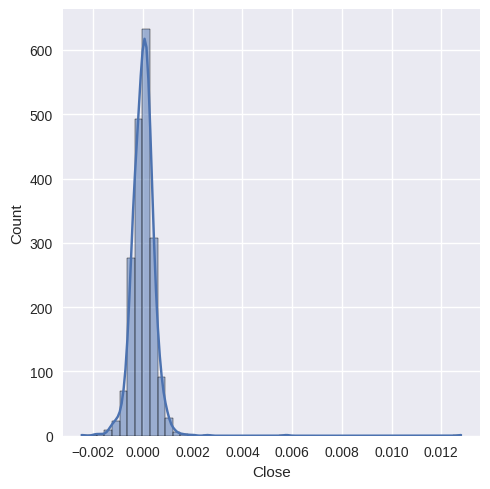

In [185]:
import seaborn as sns
sns.displot(rets['Close'], bins=50, kde=True);

(array([   1.68284522,    1.68284522,    5.04853567,   15.14560702,
          38.70544016,  116.11632047,  466.14812711,  827.95985033,
        1063.55818172,  518.31632907,  153.13891541,   47.11966628,
          10.09707135,    5.04853567,    1.68284522,    0.        ,
           1.68284522,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    1.68284522,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    1.68284522]),
 array([-2.46671250e-03, -2.16150874e-03, -1.85630498e-03, -1.55110123e-03,
        -1.24589747e-03, -9.40693716e-04, -6.35489960e-04, -3.302862

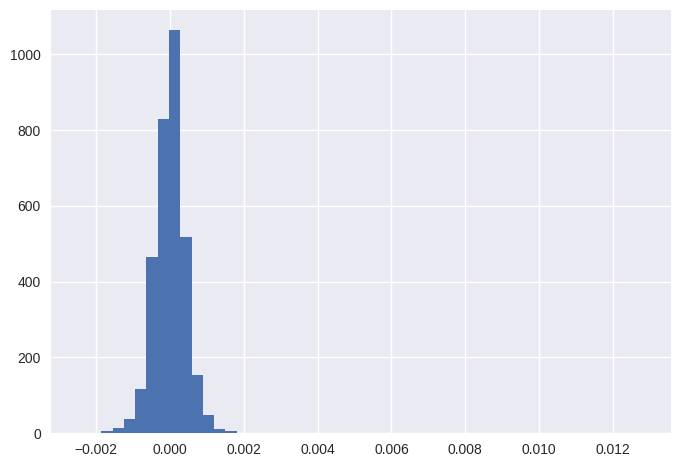

In [186]:
plt.hist(rets['Close'], density=True, bins=50)

Preparing Lagged data:

To gain insights into whether the **random walk hypothesis** holds true, we work with six lags. The code that follows derives the lagged data for every single RIC. First, a function that adds columns with lagged data to a DataFrame object.

In [187]:
def add_lags(data, ric, lags):
    cols = []
    df = pd.DataFrame(rets[ric])
    for lag in range(1, lags + 1):
        col = 'lag_{}'.format(lag)  # defines the column name
        # creates the lagged data column
        df[col] = np.digitize(df[ric].shift(lag), bins=[0])
        cols.append(col)  # stores the column name
    df.dropna(inplace=True)  # gets rid of incomplete data rows
    return df, cols

Second, the iterations over all RICs (just one stock, 'AAPL' for this example), using the add_lags function and storing the resulting DataFrame objects in a dictionary.

In [188]:
lags = 6    # five historical lags

In [189]:
cols = []
for lag in range(1, lags + 1):
  col = 'lag_{}'.format(lag)
  rets[col] = np.sign(rets['Close'].shift(lag))
  cols.append(col)
rets.dropna(inplace=True)

See link: https://hilpisch.com/tr_eikon_machine_learning.html, to implement multiple stocks as this example is just for one.

In [190]:
rets.head(7)

,Open,High,Low,Close,Adj Close,Volume,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6
Datetime,,,,,,,,,,,,
2023-03-27 09:37:00-04:00,0.001127,0.000813,0.001128,-0.000438,-0.000438,-0.440462,1.0,-1.0,-1.0,-1.0,1.0,-1.0
2023-03-27 09:38:00-04:00,-0.000377,-0.000897,-0.000031,0.000313,0.000313,0.255839,-1.0,1.0,-1.0,-1.0,-1.0,1.0
2023-03-27 09:39:00-04:00,0.000220,-0.000229,-0.001034,-0.000608,-0.000608,0.021821,1.0,-1.0,1.0,-1.0,-1.0,-1.0
2023-03-27 09:40:00-04:00,-0.000595,0.000876,0.001191,0.000984,0.000984,0.012193,-1.0,1.0,-1.0,1.0,-1.0,-1.0
2023-03-27 09:41:00-04:00,0.001075,0.000875,0.001075,0.001000,0.001000,0.143363,1.0,-1.0,1.0,-1.0,1.0,-1.0
2023-03-27 09:42:00-04:00,0.000990,0.000750,0.000927,0.001046,0.001046,-0.308143,1.0,1.0,-1.0,1.0,-1.0,1.0
2023-03-27 09:43:00-04:00,0.000937,0.001123,0.000562,0.000952,0.000952,0.147553,1.0,1.0,1.0,-1.0,1.0,-1.0


## SVM learning implementation

In [191]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [192]:
model = SVC(gamma='auto')

In [193]:
model.fit(rets[cols],np.sign(rets['Close']))

SVC(gamma='auto')

In [194]:
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel= 'rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

SVC(gamma='auto')

In [195]:
rets['Prediction'] = model.predict(rets[cols])

In [196]:
rets['Strategy'] = rets['Prediction'] * rets['Close']

This is without splitting the data.

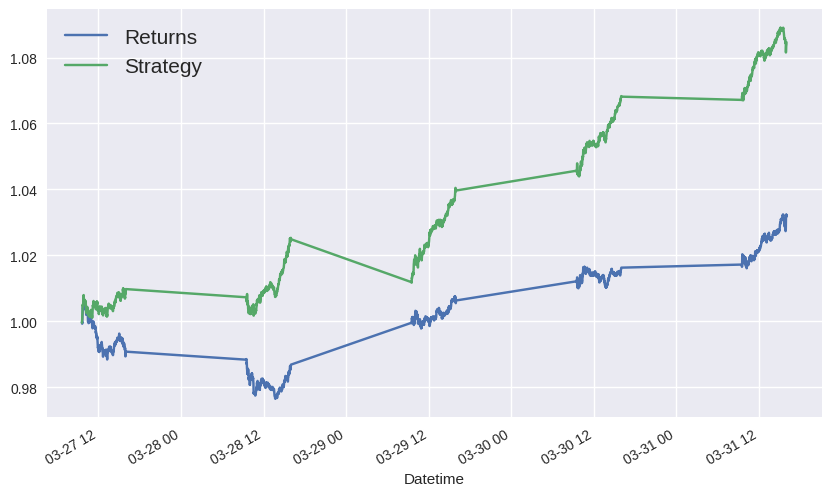

In [197]:
rets[['Close', 'Strategy']].cumsum().apply(np.exp).plot(figsize=(10,6));
plt.legend(labels = ['Returns', 'Strategy'], loc = "upper left", fontsize = 15)
plt.show()

Splitting the data:

In [198]:
cols

['lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5', 'lag_6']

In [199]:
rets[col]

Datetime
2023-03-27 09:37:00-04:00   -1.0
2023-03-27 09:38:00-04:00    1.0
2023-03-27 09:39:00-04:00   -1.0
2023-03-27 09:40:00-04:00   -1.0
2023-03-27 09:41:00-04:00   -1.0
                            ... 
2023-03-31 15:55:00-04:00   -1.0
2023-03-31 15:56:00-04:00    1.0
2023-03-31 15:57:00-04:00   -1.0
2023-03-31 15:58:00-04:00    1.0
2023-03-31 15:59:00-04:00    1.0
Name: lag_6, Length: 1941, dtype: float64

In [200]:
model = SVC(C=100)
ret = rets['Close'].copy()

In [201]:
ret_col = rets[cols].copy()

In [202]:
model.fit(ret_col, np.sign(ret))
rets['position'] = model.predict(ret_col)
#rets['position'].values[:12]

In [203]:
 print('{:10} | {}'.format('AAPL', rets['position'].values[:12]))

AAPL       | [ 1.  1. -1.  1.  1.  1.  1.  1. -1. -1. -1.  1.]


Vectorized Backtesting:

Backtest the performance of the ML-based trading stregies. First, the strategy returns.

In [204]:
#rets['Close']['Close']

In [205]:
rets['strategy'] = rets['position'] * rets['Close']

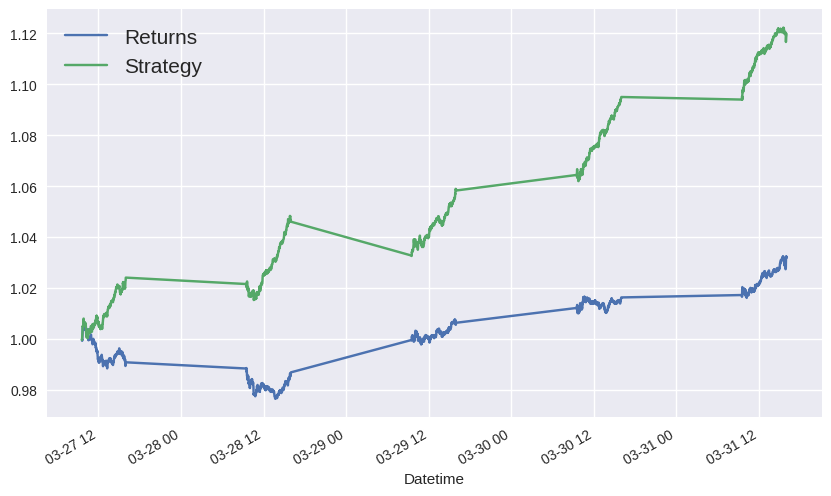

In [206]:
rets[['Close', 'strategy']].cumsum().apply(np.exp).plot(figsize=(10,6));
plt.legend(labels = ['Returns', 'Strategy'], loc = "upper left", fontsize = 15)
plt.show()

Train Test Split:

Random train test split to implement out-of-sample backtesting.

In [210]:
res = {}
model = SVC(C=100)
ret = rets['Close'].copy()
ret_col = rets[cols]
mu = ret.mean()
v = ret.std()
bins = [mu - v, mu, mu + v]
# bins = [0]
train_x, test_x, train_y, test_y = train_test_split(
    ret_col.apply(lambda x: np.digitize(x, bins=bins)),
    np.sign(ret), test_size=0.2, random_state=111)
train_x.sort_index(inplace=True)
train_y.sort_index(inplace=True)
test_x.sort_index(inplace=True)
test_y.sort_index(inplace=True)
model.fit(train_x, train_y)  # model fitting
pred = model.predict(test_x)  # prediction
strat = pred * ret[test_y.index]
res = pd.DataFrame({'AAPL': ret[test_y.index],
                             'pred': pred,
                             'strategy': strat})

In [211]:
res.head()

,AAPL,pred,strategy
Datetime,,,
2023-03-27 09:37:00-04:00,-0.000438,1.0,-0.000438
2023-03-27 09:49:00-04:00,-0.000237,-1.0,0.000237
2023-03-27 09:55:00-04:00,0.000251,1.0,0.000251
2023-03-27 09:56:00-04:00,-0.000002,-1.0,0.000002
2023-03-27 10:04:00-04:00,0.000623,-1.0,-0.000623


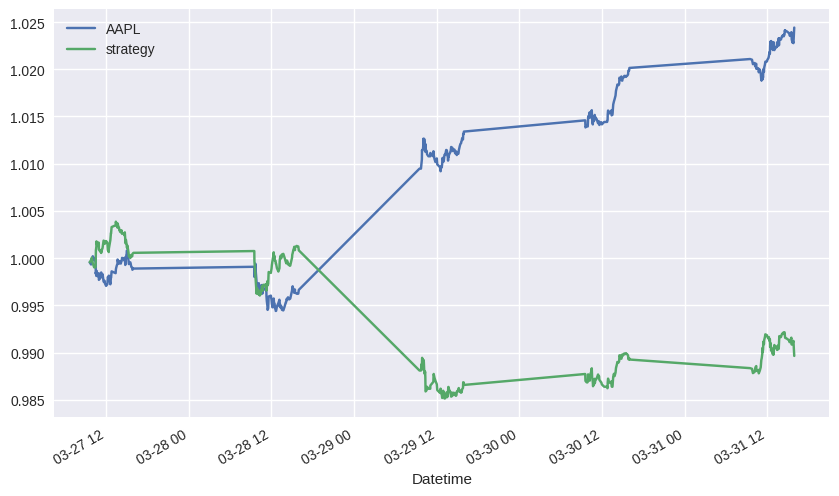

In [212]:
res[['AAPL', 'strategy']].cumsum().apply(np.exp).plot(figsize=(10,6));
plt.show()